In [1]:
import warnings
import geopandas
import pandas

warnings.filterwarnings('ignore')
geopandas.options.io_engine = "pyogrio"
%matplotlib inline

from plotting import plot_correlation, plot_parameter
import intervals

joined = geopandas.GeoDataFrame()
parameters = intervals.parameters
for index, filter_parameter in enumerate(parameters):
    i = intervals.query(filter_parameter, intervals.locations_query()).drop(['end_date', 'sample_location', 'geometry', 'parameter', 'unit'], axis=1)
    if index == 0:
        joined = pandas.concat([joined, i])
    else:
        joined = joined.merge(i, how='outer', on='start_date', suffixes = (f'_{parameters[index-1]}', f'_{filter_parameter}'))
        
    if index == len(parameters) - 1:
        joined = joined.rename(columns={
            'avg_value': f'avg_value_{filter_parameter}',
            'median_value': f'median_value_{filter_parameter}',
            'max_value': f'max_value_{filter_parameter}',
            'min_value': f'min_value_{filter_parameter}'})

joined

avg_value_temperature  median_value_temperature  max_value_temperature  \
0                    23.00                     23.00                  23.00   
1                      NaN                       NaN                    NaN   
2                      NaN                       NaN                    NaN   
3                    21.00                     21.00                  21.00   
4                      NaN                       NaN                    NaN   
..                     ...                       ...                    ...   
129                  26.41                     26.41                  26.41   
130                  20.36                     20.36                  20.36   
131                  27.27                     27.27                  27.27   
132                  25.27                     25.27                  25.27   
133                  19.77                     19.77                  19.77   

     min_value_temperature start_date  avg_value_phosphorus  \
0                    23.00 1980-04-25              0.662500   
1                      NaN 1980-08-23                   NaN   
2                      NaN 1980-12-21              4.030000   
3                    21.00 1981-04-20              1.479375   
4                      NaN 1981-08-18                   NaN   
..                     ...        ...                   ...   
129                  26.41 2022-09-12              0.060900   
130                  20.36 2023-01-10              0.111500   
131                  27.27 2023-05-10              0.110333   
132                  25.27 2023-09-07              0.152000   
133                  19.77 2024-01-05              0.101500   

     median_value_phosphorus  max_value_phosphorus  min_value_phosphorus  \
0                     0.5250                1.4000                 0.200   
1                        NaN                   NaN                   NaN   
2                     3.4000               11.0000                 0.600   
3                     0.7950                6.1000                 0.110   
4                        NaN                   NaN                   NaN   
..                       ...                   ...                   ...   
129                   0.0609                0.0748                 0.047   
130                   0.1115                0.1230                 0.100   
131                   0.1145                0.1590                 0.059   
132                   0.1520                0.1960                 0.108   
133                   0.1015                0.1510                 0.052   

     avg_value_nitrates  ...  max_value_tss  min_value_tss  avg_value_tds  \
0              3.102000  ...           84.0           84.0         165.00   
1              1.480000  ...         6670.0         3740.0         136.75   
2             15.423200  ...         4060.0         1320.0            NaN   
3              3.485000  ...         2460.0          542.0         134.00   
4                   NaN  ...            NaN            NaN            NaN   
..                  ...  ...            ...            ...            ...   
129            2.580000  ...            NaN            NaN            NaN   
130            2.580000  ...            2.2            2.2            NaN   
131            2.756667  ...            6.4            1.4            NaN   
132            2.320000  ...            1.0            1.0            NaN   
133            2.530000  ...            1.0            1.0            NaN   

     median_value_tds  max_value_tds  min_value_tds  avg_value_ecoli  \
0               165.0          191.0          139.0         635000.0   
1               135.5          156.0          120.0              NaN   
2                 NaN            NaN            NaN              NaN   
3               141.0          164.0           97.0         170000.0   
4                 NaN            NaN            NaN              NaN   
..                ...        

avg_value_temperature  median_value_temperature  max_value_temperature  \
count              97.000000                 97.000000              97.000000   
mean               21.828914                 21.889381              23.584124   
min                 6.000000                  6.000000               6.000000   
25%                19.340000                 19.340000              20.810000   
50%                22.743333                 23.000000              24.450000   
75%                25.920000                 26.000000              27.500000   
max                32.500000                 32.500000              35.000000   
std                 5.277027                  5.325157               6.009036   

       min_value_temperature           start_date  avg_value_phosphorus  \
count              97.000000                  134            117.000000   
mean               20.673505  2002-03-01 00:00:00              0.417559   
min                 6.000000  1980-04-25 00:00:00              0.020000   
25%                17.700000  1991-03-29 00:00:00              0.117250   
50%                21.000000  2002-03-01 00:00:00              0.230000   
75%                24.810000  2013-02-01 00:00:00              0.375708   
max                30.100000  2024-01-05 00:00:00              4.030000   
std                 5.317892                  NaN              0.638053   

       median_value_phosphorus  max_value_phosphorus  min_value_phosphorus  \
count               117.000000            117.000000            117.000000   
mean                  0.341683              1.036974              0.149338   
min                   0.020000              0.020500              0.004000   
25%                   0.092500              0.190000              0.040000   
50%                   0.180000              0.430000              0.080000   
75%                   0.305500              0.970000              0.186000   
max                   3.400000             11.000000              1.010000   
std                   0.557196              1.780689              0.195144   

       avg_value_nitrates  ...  max_value_tss  min_value_tss  avg_value_tds  \
count          118.000000  ...     107.000000     107.000000      49.000000   
mean             2.739215  ...     922.950093     298.070748     301.029422   
min              0.200000  ...       0.500000       0.500000      65.500000   
25%              1.413083  ...       6.435000       2.500000     172.000000   
50%              2.164500  ...     250.000000      15.400000     307.000000   
75%              3.327500  ...     980.000000     357.500000     367.333333   
max             15.423200  ...    9090.000000    3740.000000     789.000000   
std              2.213740  ...    1599.842759     613.954247     156.384028   

       median_value_tds  max_value_tds  min_value_tds  avg_value_ecoli  \
count         49.000000      49.000000      49.000000     1.030000e+02   
mean         299.530612     354.510204     257.591837     7.922877e+04   
min           65.500000      67.000000      64.000000     7.100000e+01   
25%          172.000000     191.000000     139.000000     1.847500e+03   
50%          302.000000     380.000000     230.000000     3.629400e+03   
75%          380.000000     466.000000     330.000000     5.287500e+04   
max          789.000000     836.000000     789.000000     1.472000e+06   
std          157.077821     174.466105     163.692282     2.043568e+05   

       median_value_ecoli  max_value_ecoli  min_value_ecoli  
count          103.000000     1.030000e+02       103.000000  
mean         59288.086893     1.565008e+05     32951.999029  
min             71.000000     8.690000e+01         1.000000  
25%           1682.275000     2.419600e+03       738.500000  
50%           3629.400000     4.839200e+03      2419.600000  
75%          49000.000000     7.100000e+04     12000.000000  
max         980000.000000     2.900000e+06    680000.000000  
std         148570.9990

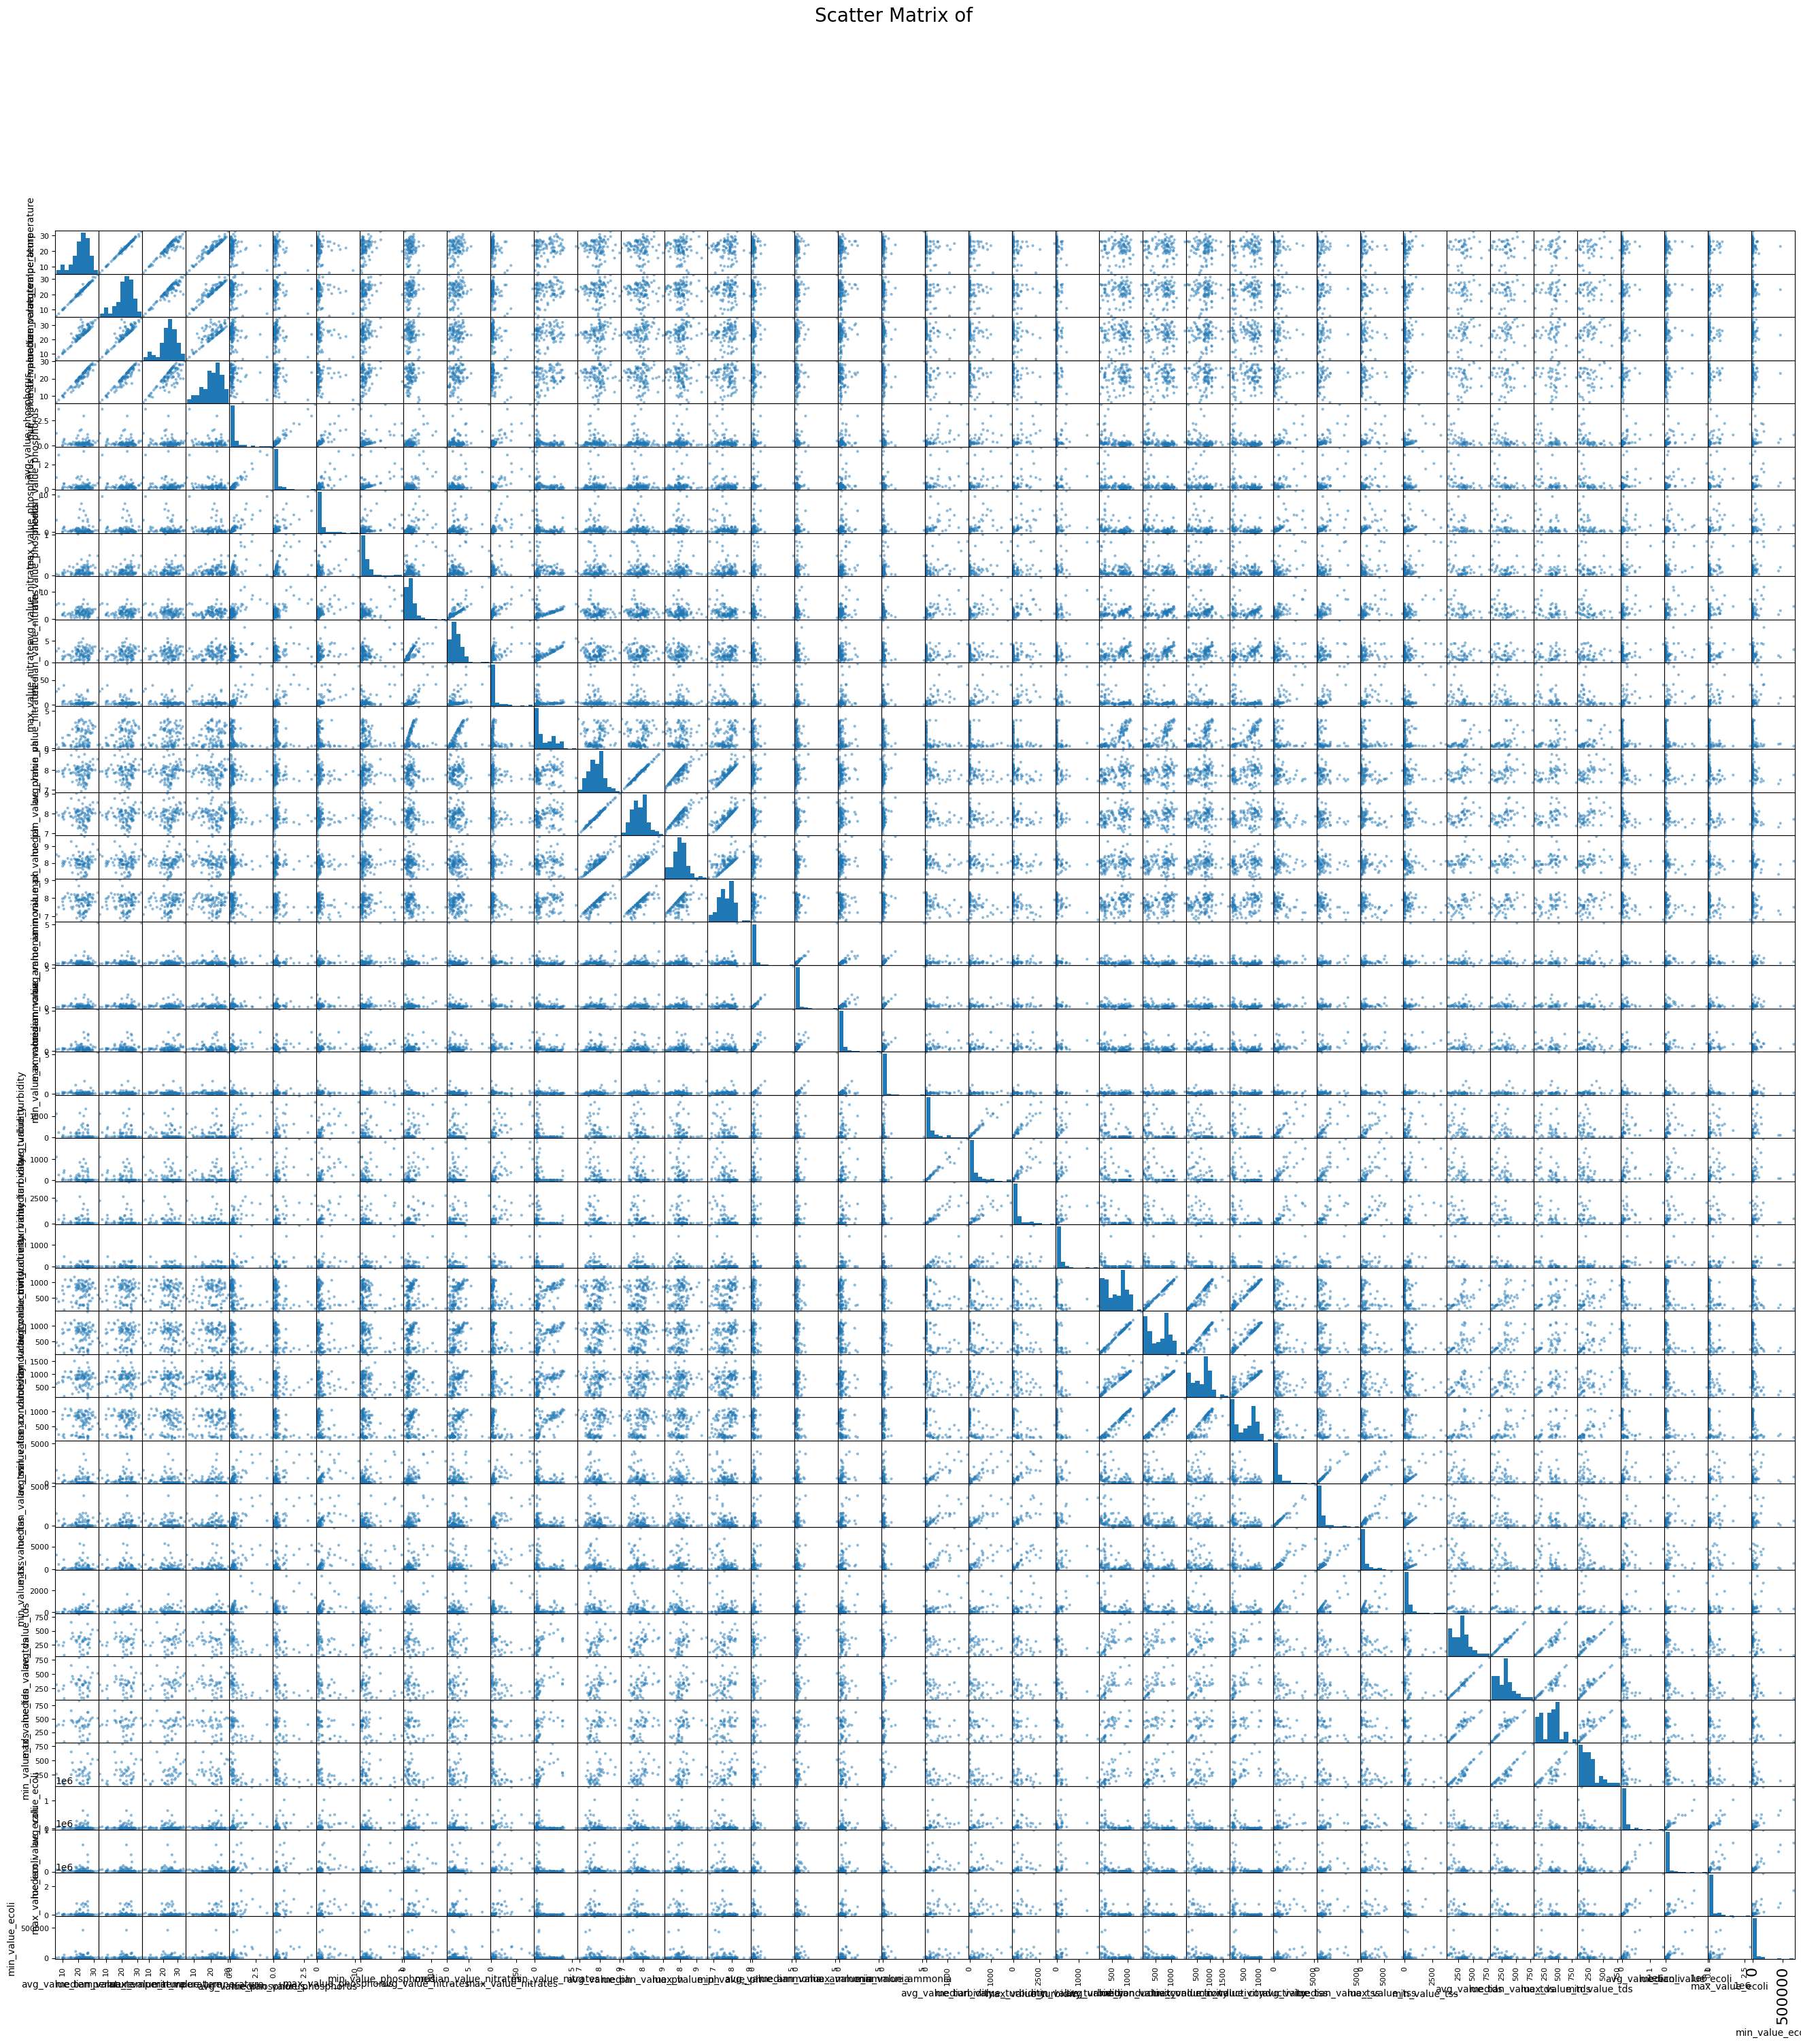

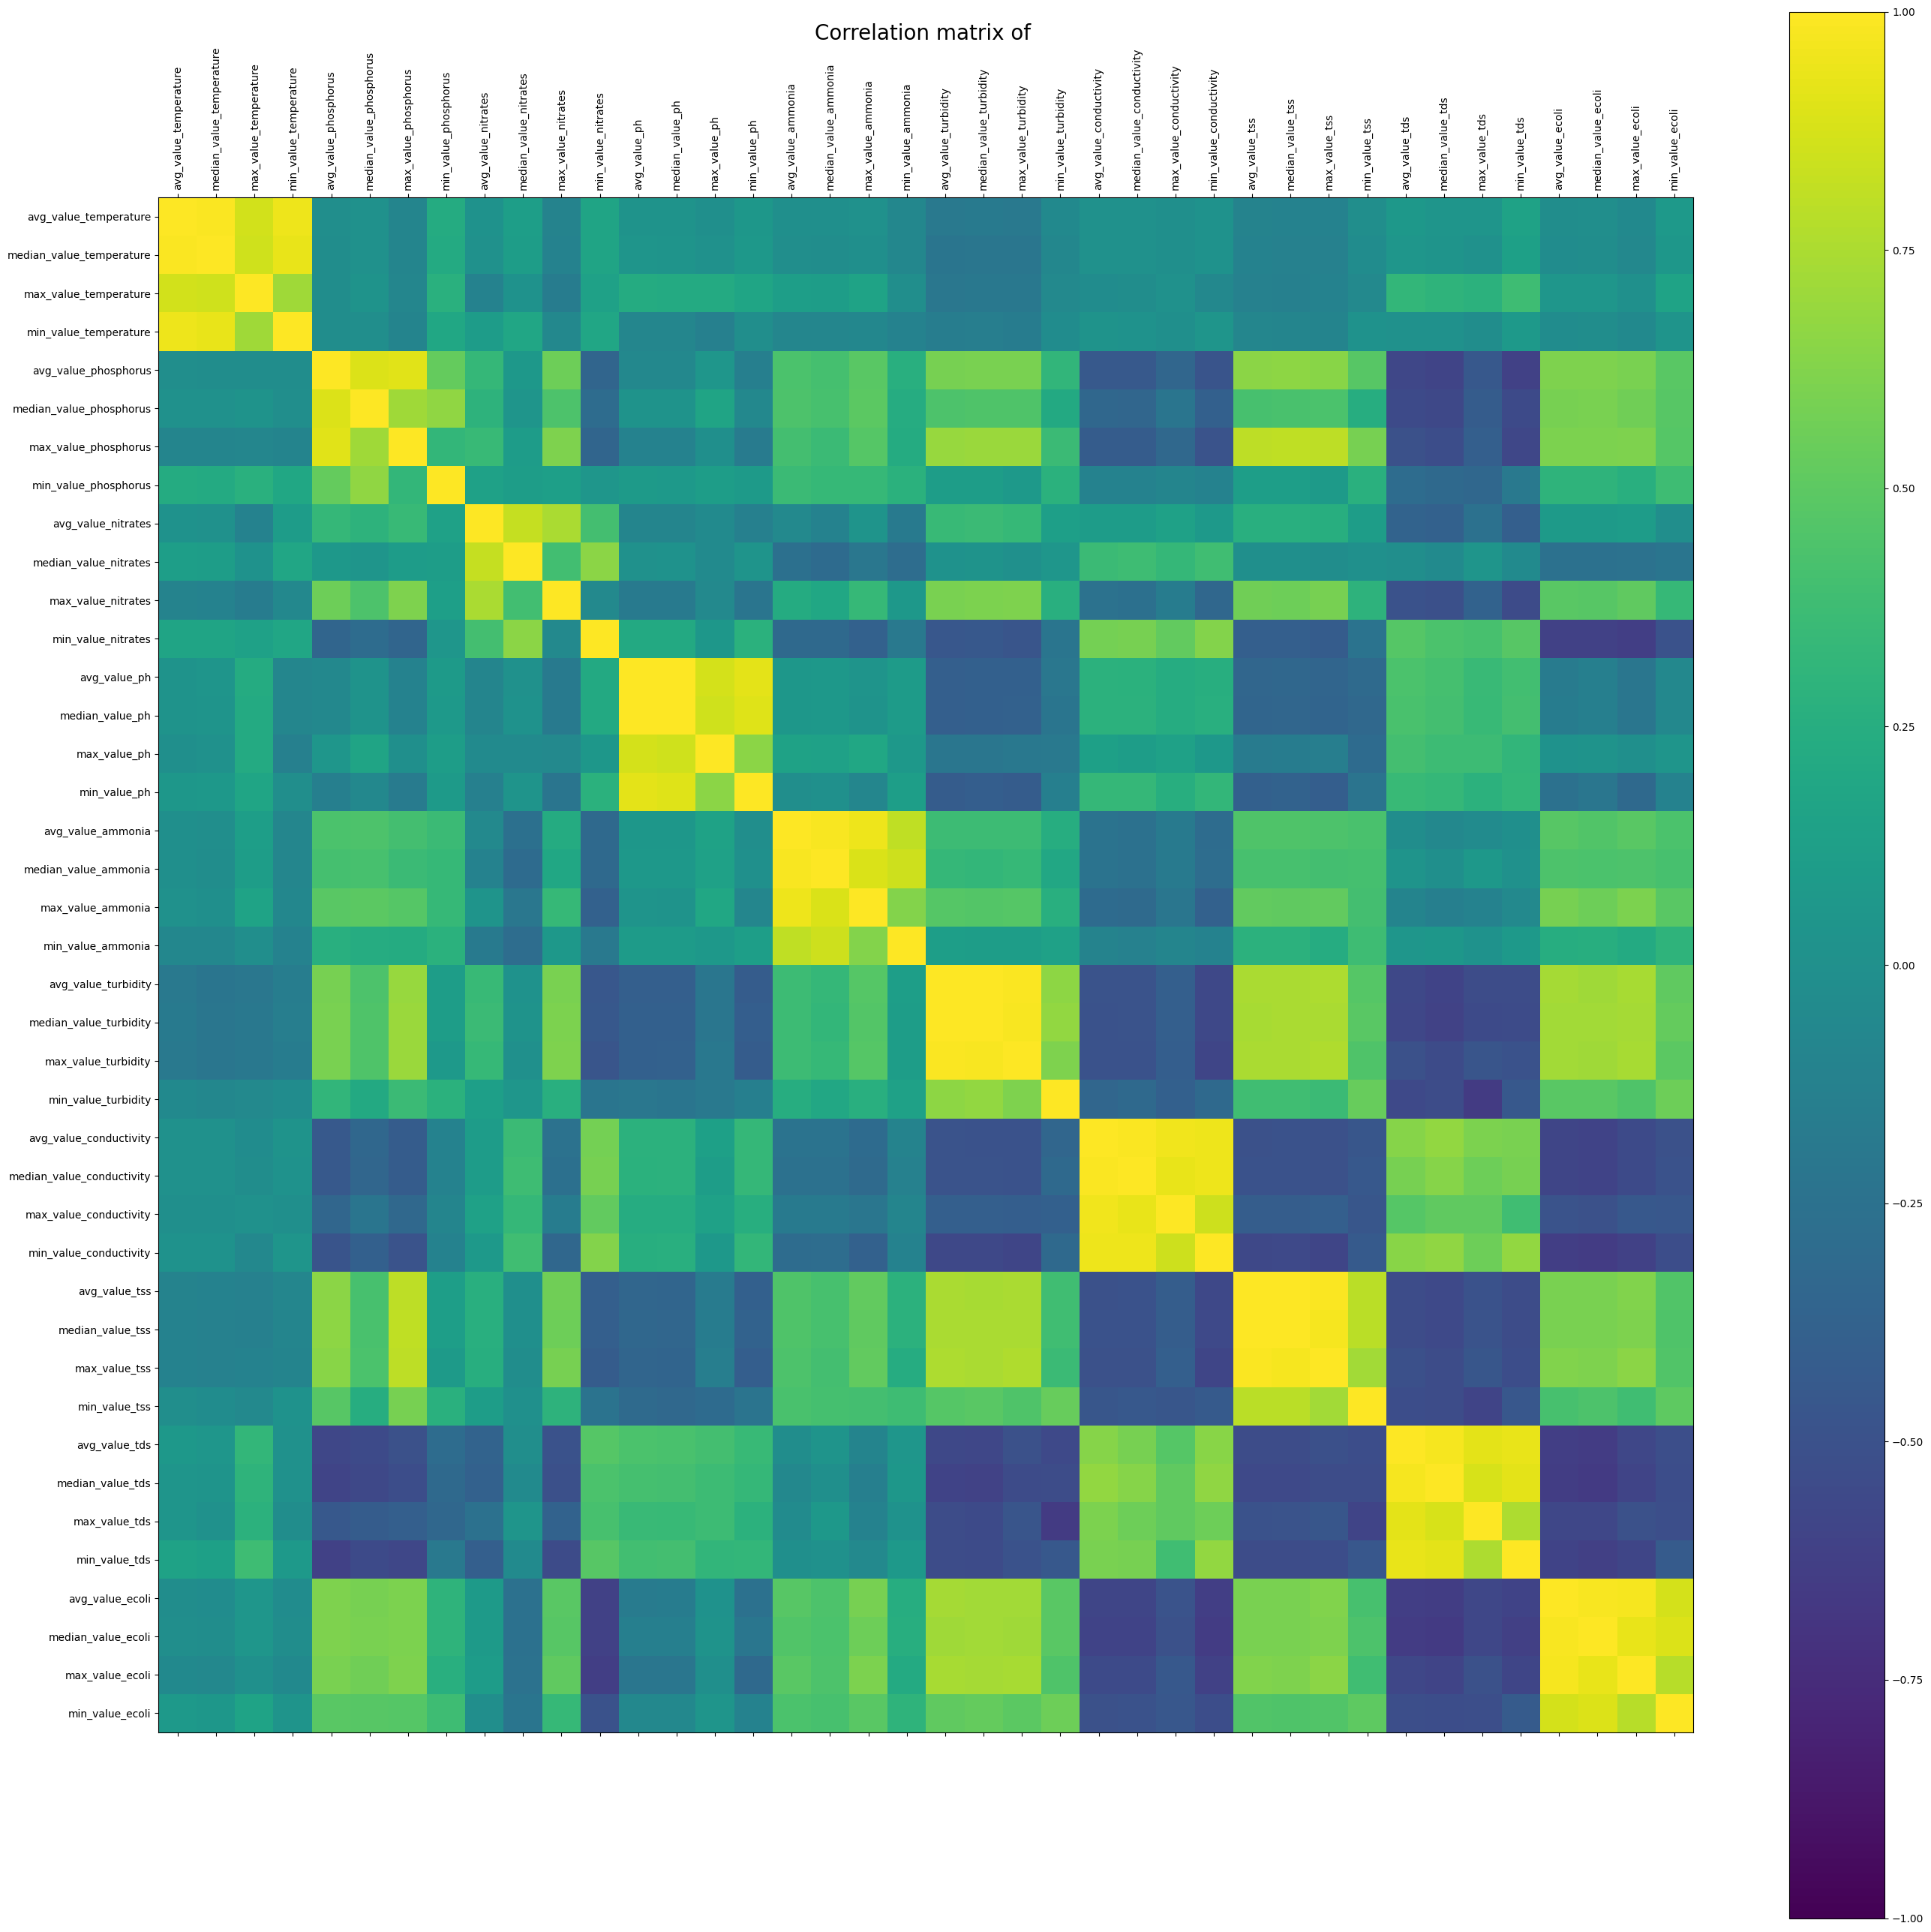

avg_value_temperature  median_value_temperature  \
avg_value_temperature                   1.000000                  0.989846   
median_value_temperature                0.989846                  1.000000   
max_value_temperature                   0.865303                  0.857747   
min_value_temperature                   0.949591                  0.930377   
avg_value_phosphorus                   -0.012759                 -0.017777   
median_value_phosphorus                 0.015585                  0.014250   
max_value_phosphorus                   -0.086722                 -0.092972   
min_value_phosphorus                    0.232627                  0.225694   
avg_value_nitrates                      0.022655                  0.009691   
median_value_nitrates                   0.122378                  0.112679   
max_value_nitrates                     -0.102807                 -0.115008   
min_value_nitrates                      0.171686                  0.169214   
avg_value_ph                            0.031242                  0.042026   
median_value_ph                         0.024600                  0.035657   
max_value_ph                           -0.003623                  0.009720   
min_value_ph                            0.060110                  0.065160   
avg_value_ammonia                      -0.003101                 -0.014565   
median_value_ammonia                   -0.005421                 -0.016835   
max_value_ammonia                       0.013556                 -0.000492   
min_value_ammonia                      -0.074317                 -0.074233   
avg_value_turbidity                    -0.189267                 -0.220117   
median_value_turbidity                 -0.182324                 -0.213081   
max_value_turbidity                    -0.191233                 -0.216578   
min_value_turbidity                    -0.052565                 -0.071278   
avg_value_conductivity                  0.012609                  0.008730   
median_value_conductivity               0.012907                  0.014685   
max_value_conductivity                 -0.000414                 -0.001686   
min_value_conductivity                  0.016768                  0.018237   
avg_value_tss                          -0.106230                 -0.114516   
median_value_tss                       -0.116965                 -0.124847   
max_value_tss                          -0.115147                 -0.120858   
min_value_tss                          -0.015291                 -0.030497   
avg_value_tds                           0.068970                  0.047669   
median_value_tds                        0.045167                  0.034321   
max_value_tds                           0.039659                  0.013308   
min_value_tds                           0.152995                  0.137461   
avg_value_ecoli                        -0.016661                 -0.030617   
median_value_ecoli                     -0.009742                 -0.021688   
max_value_ecoli                        -0.052363                 -0.066624   
min_value_ecoli                         0.071261                  0.058179   

                           max_value_temperature  min_value_temperature  \
avg_value_temperature                   0.865303               0.949591   
median_value_temperature                0.857747               0.930377   
max_value_temperature                   1.000000               0.712627   
min_value_temperature                   0.712627               1.000000   
avg_value_phosphorus                   -0.021873              -0.021478   
median_value_phosphorus                 0.028367              -0.009807   
max_value_phosphorus                   -0.082213              -0.096857   
min_value_phosphorus                    0.267929               0.189260   
avg_value_nitrates                     -0.112579               0.106187   
median_value_nitrates                   0.020016               0.180878   
max

In [2]:
plot_correlation(joined, title="")

In [3]:
#todo: turbidity and phosphorus
#todo: ecoli and phosphorus
#todo: ecoli and nitrates
#todo: ecoli and ph (alkaline)
#todo: conductivity and nitrates